In [17]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [5]:
train_dir = r"C:\Users\Harikrishnan\OneDrive\Desktop\csv\brain_tumor_dataset"  # Adjust path as needed

img_size = 150
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

C:\Users\Harikrishnan\anaconda3\envs\tf310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

C:\Users\Harikrishnan\anaconda3\envs\tf310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4672 - loss: 0.6726 - val_accuracy: 0.7400 - val_loss: 0.5513
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 552ms/step - accuracy: 0.7589 - loss: 0.5642 - val_accuracy: 0.7400 - val_loss: 0.5248
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 516ms/step - accuracy: 0.8149 - loss: 0.4981 - val_accuracy: 0.7200 - val_loss: 0.5443
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 530ms/step - accuracy: 0.7582 - loss: 0.5157 - val_accuracy: 0.7400 - val_loss: 0.5583
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 581ms/step - accuracy: 0.7970 - loss: 0.4765 - val_accuracy: 0.7600 - val_loss: 0.5481
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 528ms/step - accuracy: 0.8016 - loss: 0.4717 - val_accuracy: 0.7400 - val_loss: 0.5179
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 535ms/step - accuracy: 0.8212 - loss: 0.4576 - val_accuracy: 0.7400 - val_loss: 0.5252
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 529ms/step - accuracy: 0.8282 - loss: 0.4359 - val_accuracy: 0.7400 - val_loss: 0

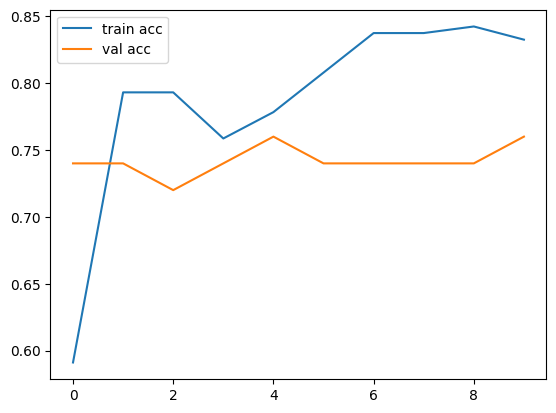

In [11]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [13]:
model.save("tumor.h5")  # Save the model after training

In [19]:
model = tf.keras.models.load_model("tumor.h5")